In [1]:
import numpy as np # For vector operation
import pandas as pd # For Data manipulation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns #For data visualization
from scipy import stats
import missingno as msng  #install statsmodels before import.
from factor_analyzer import FactorAnalyzer
from sklearn.impute import KNNImputer

In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.1MB 37kB/s  eta 0:00:01�████▊                       | 1.9MB 2.2MB/s eta 0:00:03
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 332kB/s eta 0:00:011
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=37451 sha256=1d661ad2d70d6fde41a0d0c94ddbc794c8c8b795a4d9e5a8bda64dc664f010e4
  Stored in directory: /home/nbuser/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!pip install missingno

You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
dataset=pd.read_csv("loaddata_multiple_regression.csv")
dataset.head(2)

,T-1,T-2,T-3,T-24,T
0,5502.25224,6350.08356,6515.78400,5551.82208,4931.26380
1,4931.26380,5502.25224,6350.08356,4983.17184,4775.53968


In [10]:
dataset.describe()

,T-1,T-2,T-3,T-24,T
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,6027.633628,6028.189095,6029.018795,6036.917148,6028.298499
std,1068.188422,1068.043922,1067.726081,1066.466517,1068.308193
min,3377.919600,3377.919600,3377.919600,3377.919600,3377.919600
25%,5260.014720,5260.014720,5260.014720,5263.054380,5260.014720
50%,5933.104560,5934.663360,5935.910400,5949.939600,5934.663360
75%,6738.692400,6738.692400,6738.692400,6746.759190,6738.770340
max,8841.669480,8841.669480,8841.669480,8841.669480,8841.669480


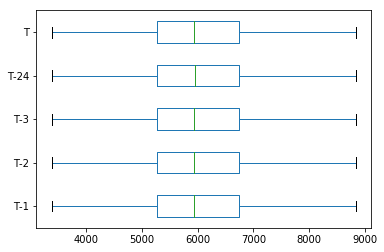

In [12]:
#check Boxplot
pd.DataFrame.boxplot(dataset,grid=False,vert=False)

In [13]:
dataset.isnull().any()

T-1     False
T-2     False
T-3     False
T-24    False
T       False
dtype: bool

In [11]:
z = np.abs(stats.zscore(dataset))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [12]:
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


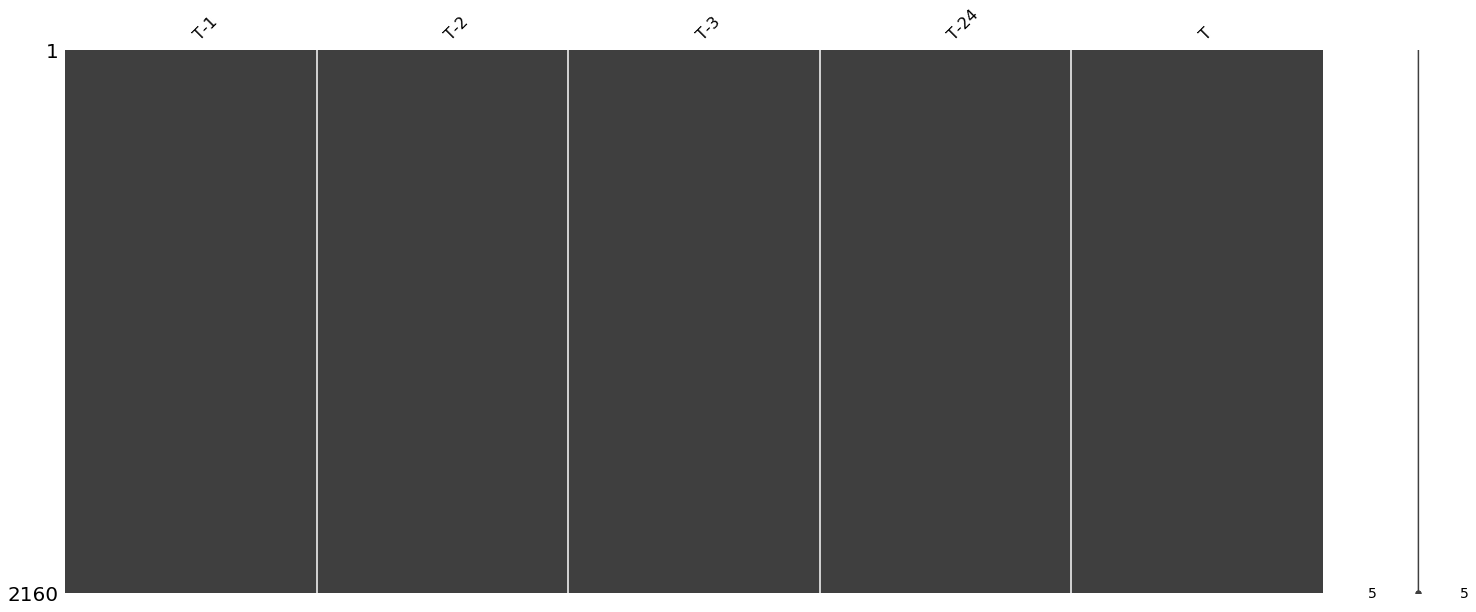

In [14]:
msng.matrix(dataset)

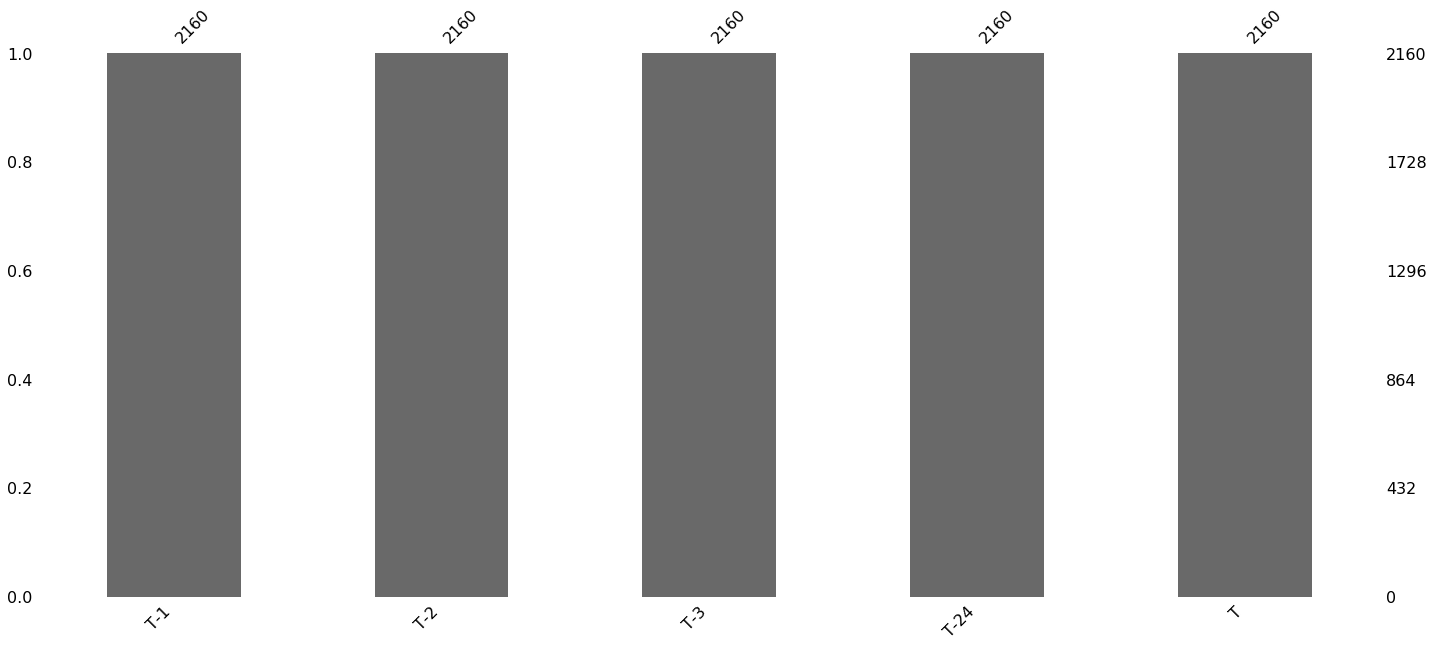

In [16]:
msng.bar(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc22cadf208>,
      dtype=object)

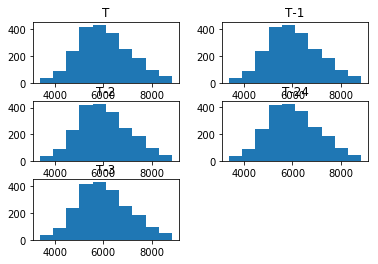

In [14]:
pd.DataFrame.hist(dataset,grid=False)

In [15]:
corr= dataset.corr()
corr

,T-1,T-2,T-3,T-24,T
T-1,1.000000,0.783398,0.547211,0.660699,0.782949
T-2,0.783398,1.000000,0.783336,0.472053,0.546609
T-3,0.547211,0.783336,1.000000,0.256744,0.286810
T-24,0.660699,0.472053,0.256744,1.000000,0.741813
T,0.782949,0.546609,0.286810,0.741813,1.000000


In [46]:
dataset.drop(["T-2", "T-3"], axis = 1, inplace = True)  

In [47]:
dataset.head()

,T-1,T-24,T
0,5502.25224,5551.82208,4931.26380
1,4931.26380,4983.17184,4775.53968
2,4775.53968,4888.39680,4713.81120
3,4713.81120,5072.95872,4689.02628
4,4689.02628,5196.25980,4844.75040


In [48]:
corr= dataset.corr()
corr

,T-1,T-24,T
T-1,1.000000,0.660699,0.782949
T-24,0.660699,1.000000,0.741813
T,0.782949,0.741813,1.000000


In [16]:
output_min=dataset.min()
output_max=dataset.max()

print(output_min)
print(output_max)

T-1     3377.9196
T-2     3377.9196
T-3     3377.9196
T-24    3377.9196
T       3377.9196
dtype: float64
T-1     8841.66948
T-2     8841.66948
T-3     8841.66948
T-24    8841.66948
T       8841.66948
dtype: float64


In [17]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data=ms.fit_transform(dataset)
print(load_data)

[[0.38880488 0.54397877 0.57430601 0.39787738 0.28430002]
 [0.28430002 0.38880488 0.54397877 0.29380046 0.25579869]
 [0.25579869 0.28430002 0.38880488 0.27645431 0.24450087]
 ...
 [0.21779692 0.22852415 0.3052124  0.68414596 0.24629825]
 [0.24629825 0.21779692 0.22852415 0.51467861 0.32438447]
 [0.32438447 0.24629825 0.21779692 0.41730621 0.65165045]]


In [18]:
dataset=pd.DataFrame(data=load_data[0:,0:]) 
print(dataset[0].values)

[0.38880488 0.28430002 0.25579869 ... 0.21779692 0.24629825 0.32438447]


In [20]:
X=dataset.iloc[:,0:4].values
Y=dataset.iloc[:,4:].values
print(Y)

[[0.28430002]
 [0.25579869]
 [0.24450087]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) # Train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df

,0,1,2,3
0,0.613483,-0.002561,-0.134731,0.381256


In [34]:
print(X_train[2])

[0.50914382 0.37930444 0.30840775 0.58372086]


In [42]:
y_pred = regressor.predict(X_test)
print(y_pred[2]*(output_max[0]-output_min[0])+output_min[0])
print(y_test[2]*(output_max[0]-output_min[0])+output_min[0])


[5127.76703714]
[5052.38256]


In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07401847160724853
Mean Squared Error: 0.011734588078881406
Root Mean Squared Error: 0.10832630372574062


# Dimentionality Reduction

In [45]:
dataset=pd.read_csv("loaddata_multiple_regression.csv")
dataset.head(2)

,T-1,T-2,T-3,T-24,T
0,5502.25224,6350.08356,6515.78400,5551.82208,4931.26380
1,4931.26380,5502.25224,6350.08356,4983.17184,4775.53968


In [46]:
corr= dataset.corr()
corr

,T-1,T-2,T-3,T-24,T
T-1,1.000000,0.783398,0.547211,0.660699,0.782949
T-2,0.783398,1.000000,0.783336,0.472053,0.546609
T-3,0.547211,0.783336,1.000000,0.256744,0.286810
T-24,0.660699,0.472053,0.256744,1.000000,0.741813
T,0.782949,0.546609,0.286810,0.741813,1.000000


In [47]:
dataset.drop(["T-2"], axis = 1, inplace = True)  

In [48]:
dataset.head()

,T-1,T-3,T-24,T
0,5502.25224,6515.78400,5551.82208,4931.26380
1,4931.26380,6350.08356,4983.17184,4775.53968
2,4775.53968,5502.25224,4888.39680,4713.81120
3,4713.81120,4931.26380,5072.95872,4689.02628
4,4689.02628,4775.53968,5196.25980,4844.75040


In [49]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data=ms.fit_transform(dataset)
print(load_data)

[[0.38880488 0.57430601 0.39787738 0.28430002]
 [0.28430002 0.54397877 0.29380046 0.25579869]
 [0.25579869 0.38880488 0.27645431 0.24450087]
 ...
 [0.21779692 0.3052124  0.68414596 0.24629825]
 [0.24629825 0.22852415 0.51467861 0.32438447]
 [0.32438447 0.21779692 0.41730621 0.65165045]]


In [50]:
dataset=pd.DataFrame(data=load_data[0:,0:]) 
print(dataset[0].values)

[0.38880488 0.28430002 0.25579869 ... 0.21779692 0.24629825 0.32438447]


In [52]:
X=dataset.iloc[:,0:3].values
Y=dataset.iloc[:,3:].values
print(X)

[[0.38880488 0.57430601 0.39787738]
 [0.28430002 0.54397877 0.29380046]
 [0.25579869 0.38880488 0.27645431]
 ...
 [0.21779692 0.3052124  0.68414596]
 [0.24629825 0.22852415 0.51467861]
 [0.32438447 0.21779692 0.41730621]]


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) # Train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df

,0,1,2
0,0.607104,-0.148058,0.401526


In [56]:
y_pred = regressor.predict(X_test)
print(y_pred[2]*(output_max[0]-output_min[0])+output_min[0])
print(y_test[2]*(output_max[0]-output_min[0])+output_min[0])

[5279.64467555]
[4993.45992]


In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07577524900837894
Mean Squared Error: 0.01186247573931024
Root Mean Squared Error: 0.10891499317959048
